# AirTable

Testing access to Airtable dataset via the airtable HTTP API. Requires a valid api_token.

https://airtable.com/appQbIS18Qc8GskMC/api/docs#curl/table:quotes:list

Looks like we can only load 100 rows at a time. We need to use pagination and joins to extract all data from the REST API.

In [56]:
import getpass
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
api_token = getpass.getpass()

 ·················


In [12]:
url = "https://api.airtable.com/v0/appQbIS18Qc8GskMC/Quotes"

In [13]:
params = {'api_key': api_token}
r = requests.get(url=url, params=params)

In [14]:
tmp = []
for row in r.json().get('records'):
    tmp.append(row.get('fields'))
df = pd.DataFrame(tmp)

In [15]:
len(df)

100

In [16]:
df.head()

,Quotes,Sub-Tags,Platform,Study,Participant,quote_id
0,I started with maps which was ok. I selected c...,"[recqSLy44kvaldDie, rec2dtAU6AQmZRtBp]",[recsT2ijAss13Fi2o],[recL9cedQRzGUKQmN],[recckJBJDSGLsjqOT],123
1,SDGs I knew already. I didn’t know the NDCs ev...,[recPj0UcuXHPsKaHQ],[recGL9hhVifrnrn0c],[recL9cedQRzGUKQmN],[rec5Fxbhf4QwXpFYj],647
2,There seem to be a lot more data. Lots of opti...,[recxhYr8LmVR0KM15],[recz299kfcyPQKWot],[recL9cedQRzGUKQmN],[recIMbEGo8zK1jKMI],782
3,"Global Fishing watch, for 10 minutes, didn’t g...",[recXLs04jMilVhLHA],"[recpljX7elGfy9aVE, recDicfhFnLpNHg5M]",[recL9cedQRzGUKQmN],[rec8TcDFCXfTvTcW1],1359
4,I wanted to see what the mapping is like and i...,"[recqSLy44kvaldDie, rec4agB7NRtMXFffa, recdyax...",[recfbCmz2tnt4H8Zj],[recL9cedQRzGUKQmN],[recbcRmT5X1HBZXTf],328


Interesting, looks like the tags are associated to a uniqe ID, it is that ID that is returned, not the string label of the tags. Will need to create a mapping to the strings in Python.

In [18]:
df.tail()

,Quotes,Sub-Tags,Platform,Study,Participant,quote_id
95,Biodiversity. Country-specific. General data s...,[recThxYCIPwewDP1h],[recz299kfcyPQKWot],[recL9cedQRzGUKQmN],[recwGRtYQCRZyG2Bh],753
96,"these numbers are quite good, three million pl...","[recxhYr8LmVR0KM15, recWgLx9yG38DiTfk, recKueE...",[recDicfhFnLpNHg5M],[recL9cedQRzGUKQmN],[rec5Fxbhf4QwXpFYj],1165
97,I guess the abbreviation here is million tons...,"[recANsXhuaYlIuNsF, reccf1cVYiwjonnhu]",[recGL9hhVifrnrn0c],[recL9cedQRzGUKQmN],[rec5Fxbhf4QwXpFYj],651
98,"there is a lot of information, I like that. ...","[recZXOxoDMbLGhMcl, recD3JEqhaRFNXyAJ]",[recz299kfcyPQKWot],[recL9cedQRzGUKQmN],[rec8TcDFCXfTvTcW1],842
99,We have used these sort of diagrams before to ...,[reccc0V3j2lZjuShl],[recsT2ijAss13Fi2o],[recL9cedQRzGUKQmN],[recYbRdqc4TKVQS1I],9


## Loading data directly

Might be easier just to grab the data directly outside of the API

In [20]:
csv = pd.read_csv("/Users/Ben/Downloads/Quotes-Grid.csv")

In [23]:
csv.head()

,Quotes,quote_id,Sub-Tags,Platform,Study,Participant,Interview,Screen recording
0,Yeah that hummingbirds which I’m still wonderi...,1499,quality,Half Earth,Maddie's study,P24,NaN,NaN
1,I like maps but I found that one quite confusi...,1500,"map,little,overwhelming",Half Earth,Maddie's study,P24,NaN,NaN
2,So what I was hoping it would do would be to b...,1501,"map,layers",Half Earth,Maddie's study,P24,NaN,NaN
3,Also the colours didn't really work or relate ...,1502,"map,colours",Half Earth,Maddie's study,P24,NaN,NaN
4,yeah it just was a bit messy and too much inf...,1503,"overwhelming,demanding",Half Earth,Maddie's study,P24,NaN,NaN


In [22]:
len(csv)

1714

In [44]:
bag_of_tags = []
for tag in csv['Sub-Tags']:
    #print(tag, tag == tag)
    if tag == tag:
        tmp = tag.split(',')
        for item in tmp:
            bag_of_tags.append(item)

In [47]:
# Unique sub-tags
set(bag_of_tags)

{'access',
 'access barrier ',
 'access barrier deterrent',
 'acronyms/abbreviations',
 'animation',
 'appealing',
 'audience specific learning',
 'colours',
 'convincing ',
 'curiosity ',
 'demanding',
 'detailed learning',
 'doubts ',
 'emotional',
 'exciting ',
 'flow diagrams',
 'fun',
 'general learning',
 'globe',
 'graph',
 'guidance',
 'impressive ',
 'interaction',
 'landscape view',
 'latency ',
 'layers',
 'little',
 'map',
 'memorable',
 'meta data/source',
 'more data/ info wanted',
 'navigation',
 'overwhelming',
 'personal',
 'persuasive',
 'photo',
 'quality',
 'ranking ',
 'rarity/richness',
 'science',
 'shocking',
 'static',
 'striking',
 'study time ',
 'surprising',
 'trust ',
 'user experience ',
 'video'}

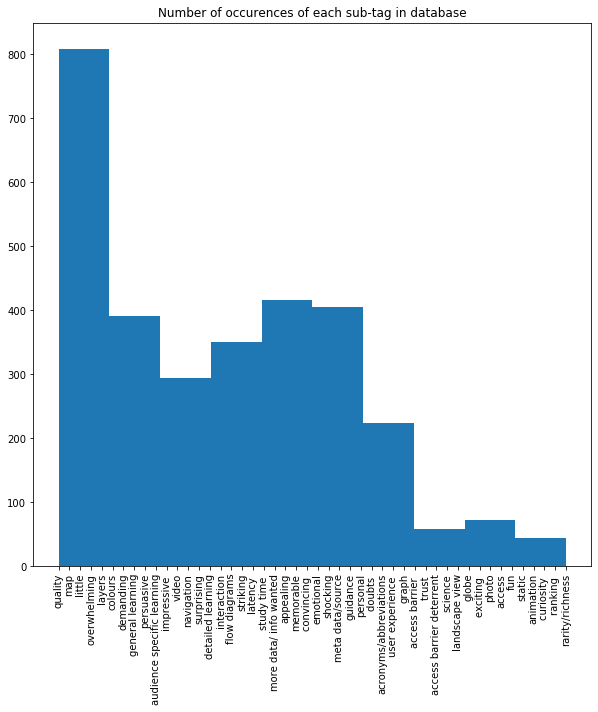

In [65]:
plt.figure(figsize=(10,10))
plt.hist(bag_of_tags)
plt.title("Number of occurences of each sub-tag in database")
_ = plt.xticks(rotation=90)

In [49]:
#!pip install vaderSentiment

In [50]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [100]:
sentences = {}
analyzer = SentimentIntensityAnalyzer()
for row in range(len(csv)):
    try:
        sentence = csv.iloc[row]['Quotes']
        quote_id = csv.iloc[row]['quote_id']
        vs = analyzer.polarity_scores(sentence)
        sentences[quote_id] = {'sentence': sentence, 'vs': vs}
    except:
        pass

In [101]:
print(f"extracted senteiment for {len(sentences)} out of {len(csv)} quotes")

extracted senteiment for 1587 out of 1714 quotes


In [108]:
# We can now access each sentence using its quote_id as an index

sentences[1]

{'sentence': 'I learnt that trade flows for commodities are very complex. It seemed to be focused on commodities that result in land use change and deforestation. There was a focus on certain exporter countries. There are lots of companies listed which when navigating through made it difficult. I learnt that certain parts of the world are exporting certain goods and that is having certain impacts. That leads to different chains in the supply and to the countries that ultimately consume. ',
 'vs': {'neg': 0.03, 'neu': 0.838, 'pos': 0.132, 'compound': 0.7579}}